# Nueral Networks ??
- NNs learn features and extracts them in so called (representation learning).
- power of neural-network is in the complexity of connections these neurons can form
- NNs work better when large amounts of data
- NNs require GPUs/TPUs mostly


## single neuron
<center>

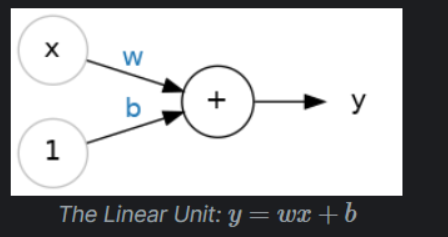

For the input x, what reaches the neuron is w * x   
A neural network "learns" by modifying its weights.  
The bias enables the neuron to modify the output independently of its inputs.   
`y = w * x + b`  

</center>

<center>

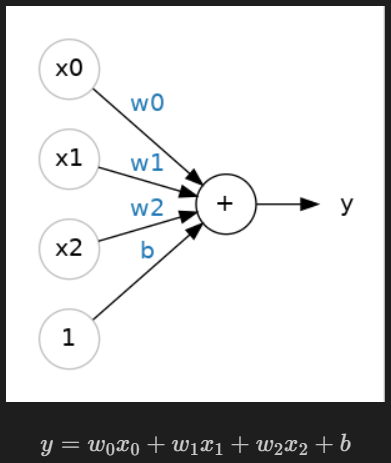

$y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$

</center>

## activation and more layers
Dense layers need activation functions to introduce nonlinearity, enabling complex pattern learning.    
An activation function is simply some function we apply to each of a layer's outputs (its activations).
The most common is the rectifier function max(0,x) or Tanh



<center>

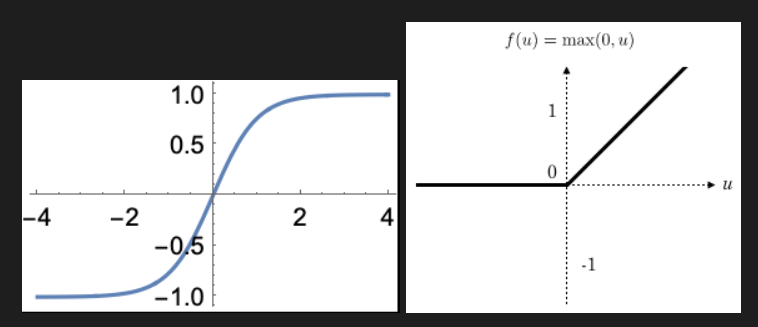
</center>

<center>

<center/>

<center>

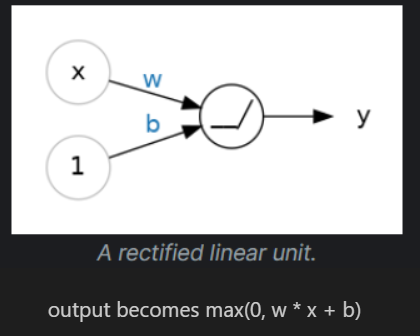

</center>

## optimizer
The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent.   
They are iterative algorithms that train a network in steps. One step of training goes like this:

Sample some training data and run it through the network to make predictions.
Measure the loss between the predictions and the true values.
Finally, adjust the weights in a direction that makes the loss smaller.
Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

<center>

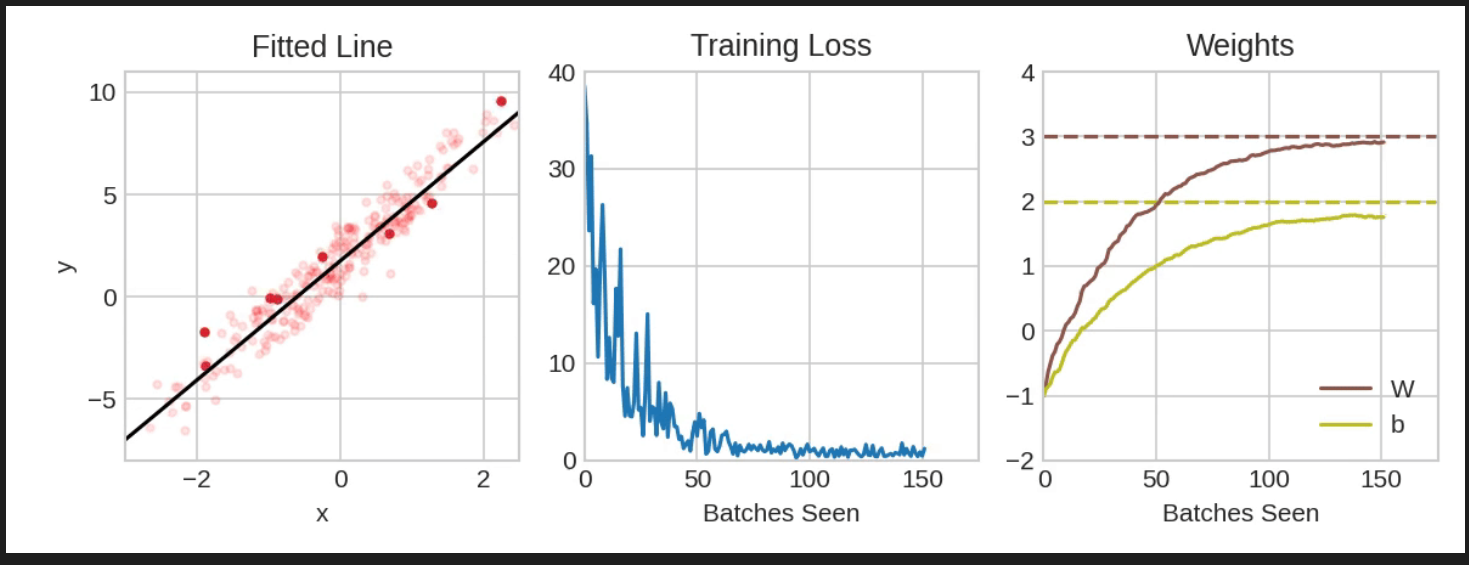

Training a neural network with Stochastic Gradient Descent.


Each iteration's sample of training data is called a minibatch (or often just "batch"),   
while a complete round of the training data is called an epoch.  
 The number of epochs you train for is how many times the network will see each training example.
</center>

## Example 1: Neural Network with NumPy


In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
iris_data = load_iris()  # returns a dict
print(iris_data.keys(), '\n')

print('given features:', iris_data['feature_names'])
print('flower names (class names):', iris_data['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

given features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
flower names (class names): ['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris_data['data'].shape)
# what does 150 ,4 mean?
# 150 is the number of samples
# 4 is the number of features

(150, 4)


In [ ]:
df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
df['target'] = iris_data['target']
df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
print("Flower type distribution:")
for i, flower in enumerate(iris_data['target_names']):
    count = (iris_data['target'] == i).sum()
    print(f"{flower}: {count} samples")

Flower type distribution:
setosa: 50 samples
versicolor: 50 samples
virginica: 50 samples


In [ ]:
X = iris_data['data']    # all features
y = iris_data['target']  # all targets

print("X shape:", X.shape)  # should be (150, 4)
print("y shape:", y.shape)  # should be (150,)

X shape: (150, 4)
y shape: (150,)


In [ ]:
print(pd.DataFrame(X[:10], columns=iris_data['feature_names']))
print()
print(y[:])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

In [ ]:
# Convert labels to one-hot encoded format
def one_hot_encode(y):
    # This function converts numeric labels into one-hot encoded format
    # For example, if y = [0, 1, 2], it becomes:
    # [[1, 0, 0],
    #  [0, 1, 0],
    #  [0, 0, 1]]

    n_classes = 3  # we have 3 flower types (setosa, versicolor, virginica)
    n_samples = len(y)  # number of samples in the dataset

    # Create a zero matrix of shape (n_samples, n_classes)
    one_hot = np.zeros((n_samples, n_classes))

    # For each sample, set the corresponding class position to 1
    # If y[i] = 0, then one_hot[i,0] = 1
    # If y[i] = 1, then one_hot[i,1] = 1
    # If y[i] = 2, then one_hot[i,2] = 1
    for i in range(n_samples):
        one_hot[i, y[i]] = 1
    return one_hot

y_encoded = one_hot_encode(y)

print("Samples for each flower type:")
for i, flower in enumerate(iris_data['target_names']):
    sample_idx = np.where(y == i)[0][0]
    print(f"\n{flower}:")
    print(f"Original label: {y[sample_idx]}")
    print(f"One-hot encoded: {y_encoded[sample_idx]}")

Samples for each flower type:

setosa:
Original label: 0
One-hot encoded: [1. 0. 0.]

versicolor:
Original label: 1
One-hot encoded: [0. 1. 0.]

virginica:
Original label: 2
One-hot encoded: [0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split

# First split the raw data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=24489,
    shuffle=True
)


In [ ]:
print("Training set shapes:")
print("X_train:", X_train.shape)  # Should be (120, 4)
print("y_train:", y_train.shape)  # Should be (120, 3)
print("\nTest set shapes:")
print("X_test:", X_test.shape)    # Should be (30, 4)
print("y_test:", y_test.shape)    # Should be (30, 3)

Training set shapes:
X_train: (120, 4)
y_train: (120, 3)

Test set shapes:
X_test: (30, 4)
y_test: (30, 3)


![image.png](attachment:image.png)

In [ ]:
learning_rate = 0.1
EPOCHS = 500

ni = 4
nh = 8
no = 3

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
        # Formula: softmax(x_i) = exp(x_i) / Σ(exp(x_j)) for j=1...K
        # Numerically stable version:
        # softmax(x_i) = exp(x_i - max(x)) / Σ(exp(x_j - max(x))) for j=1...K
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtract max for numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)   # Normalize to get probabilities

def cross_entropy_loss(y_true, y_hat, epsilon=1e-15):
        # Add small epsilon (1e-15) to prevent log(0) which is undefined
        y_hat = y_hat + epsilon

        # Cross entropy loss formula: -(1/m)∑(y_true * log(y_hat))
        # where:
        # y_true is one-hot encoded labels (shape: [batch_size, num_classes])
        # y_hat is predicted probabilities (shape: [batch_size, num_classes])
        # y_true.shape[0] is batch_size (m)
        return -np.sum(y_true * np.log(y_hat)) / y_true.shape[0]

np.random.seed(29387523)

W1, b1, W2, b2 = initialize_parameters(ni, nh, no)

for epoch in range(EPOCHS):
    # Forward pass
    Z1 = X_train @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)

    # Calculate loss
    loss = cross_entropy_loss(y_train, A2)

    # Backward pass
    m = X_train.shape[0]
    dZ2 = A2 - y_train
    dW2 = (1/m) * (A1.T @ dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = (dZ2 @ W2.T) * relu_derivative(Z1)
    dW1 = (1/m) * (X_train.T @ dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

    # Update parameters
    learning_rate = 0.1
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        train_pred = np.argmax(A2, axis=1)
        train_true = np.argmax(y_train, axis=1)
        train_acc = np.mean(train_pred == train_true)
        print(f"[For-loop] Epoch {epoch}, Loss: {loss:.4f}, Training Accuracy: {train_acc:.4f}")

# Test evaluation

# Forward pass
Z1_test = X_test @ W1 + b1
A1_test = relu(Z1_test)
Z2_test = A1_test @ W2 + b2

predictions = softmax(Z2_test)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

print("\n[For-loop] Test Results:")
print(f"Test Accuracy: {np.mean(pred_labels == true_labels):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(true_labels, pred_labels,
                          target_names=iris_data['target_names']))
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, pred_labels))


[For-loop] Epoch 0, Loss: 9.1648, Training Accuracy: 0.3417
[For-loop] Epoch 100, Loss: 0.5075, Training Accuracy: 0.6917
[For-loop] Epoch 200, Loss: 0.4134, Training Accuracy: 0.8583
[For-loop] Epoch 300, Loss: 0.3152, Training Accuracy: 0.8833
[For-loop] Epoch 400, Loss: 0.2704, Training Accuracy: 0.8667

[For-loop] Test Results:
Test Accuracy: 0.9333

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.89      0.89      0.89         9
   virginica       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[ 8  0  0]
 [ 0  8  1]
 [ 0  1 12]]


## using classes

In [ ]:
class NeuralNetwork_numpy:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases:
        # W1, b1 are for the first (hidden) layer
        # W2, b2 are for the second (output) layer
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward pass exactly as in equations
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.relu(self.Z1)        # σ(Z[1])

        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = self.softmax(self.Z2)        # σ(Z[2])

        return self.A2

    def backward(self, X, Y):
        m = X.shape[0] # 120 in this case

        # Output layer
        dZ2 = self.A2 - Y                    # dZ[2] = A[2] - Y
        dW2 = (1/m) * (self.A1.T @ dZ2)     # dW[2] = (1/m) * dZ[2]A[1]T
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        # Hidden layer
        dZ1 = (dZ2 @ self.W2.T) * self.relu_derivative(self.Z1)  # dZ[1] = W[2]T dZ[2] * g'(Z[1])
        dW1 = (1/m) * (X.T @ dZ1)           # dW[1] = (1/m) * dZ[1]XT
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        # Formula: softmax(x_i) = exp(x_i) / Σ(exp(x_j)) for j=1...K
        # Numerically stable version:
        # softmax(x_i) = exp(x_i - max(x)) / Σ(exp(x_j - max(x))) for j=1...K
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtract max for numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)   # Normalize to get probabilities



    def cross_entropy_loss(self, y_true, y_hat, epsilon=1e-15):
        # Add small epsilon (1e-15) to prevent log(0) which is undefined
        y_hat = y_hat + epsilon

        # Cross entropy loss formula: -(1/m)∑(y_true * log(y_hat))
        # where:
        # y_true is one-hot encoded labels (shape: [batch_size, num_classes])
        # y_hat is predicted probabilities (shape: [batch_size, num_classes])
        # y_true.shape[0] is batch_size (m)
        return -np.sum(y_true * np.log(y_hat)) / y_true.shape[0]

In [ ]:
np.random.seed(29387523)

nn = NeuralNetwork_numpy(input_size=ni, hidden_size=nh, output_size=no)

# Training loop
for epoch in range(EPOCHS):

    # Forward pass
    y_hat = nn.forward(X_train)

    # Calculate loss
    loss = nn.cross_entropy_loss(y_train, y_hat)

    # Backward pass and update
    dW1, db1, dW2, db2 = nn.backward(X_train, y_train)
    nn.update_params(dW1, db1, dW2, db2, learning_rate)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        # Convert predicted probabilities to class labels (0, 1, or 2)
        train_pred = np.argmax(y_hat, axis=1)

        # Convert one-hot encoded true labels to class labels (0, 1, or 2)
        train_true = np.argmax(y_train, axis=1)

        # Calculate accuracy by comparing predicted vs true labels
        # np.mean() of boolean array gives fraction of correct predictions
        train_acc = np.mean(train_pred == train_true)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Training Accuracy: {train_acc:.4f}")

# Test evaluation
predictions = nn.forward(X_test)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

print(f"Test Accuracy: {np.mean(pred_labels == true_labels):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(true_labels, pred_labels,
                          target_names=iris_data['target_names']))
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, pred_labels))

Epoch 0, Loss: 9.1648, Training Accuracy: 0.3417
Epoch 100, Loss: 0.5075, Training Accuracy: 0.6917
Epoch 200, Loss: 0.4134, Training Accuracy: 0.8583
Epoch 300, Loss: 0.3152, Training Accuracy: 0.8833
Epoch 400, Loss: 0.2704, Training Accuracy: 0.8667
Test Accuracy: 0.9333

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.89      0.89      0.89         9
   virginica       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[ 8  0  0]
 [ 0  8  1]
 [ 0  1 12]]


# Neural Network with Pytorch

In [ ]:
pip install torch-adopt

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from adopt import ADOPT #pip install torch-adopt

In [ ]:
class Pytorch_model(nn.Module):
    def __init__(self, input_size=ni, hidden_size=nh, output_size=no):
        super(Pytorch_model, self).__init__()
        # Define layers
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Forward pass
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        # x = self.softmax(x)
        return x

## SGD and Adam and AdamW

In [ ]:

torch.manual_seed(29387523)
nn_model = Pytorch_model()

# CrossEntropyLoss combines nn.LogSoftmax() and nn.NLLLoss() in a single class
# The math behind this:
# 1. First, LogSoftmax computes: log(softmax(x)) = log(exp(x_i)/sum(exp(x)))
# 2. Then NLLLoss computes: -sum(target * log_softmax(x))
# This is numerically more stable than computing softmax first
# That's why we don't need softmax in the model's forward pass
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(nn_model.parameters(), lr=0.1)

X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(np.argmax(y_train, axis=1))  # CrossEntropyLoss expects class indices, not one-hot
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(np.argmax(y_test, axis=1))

# Training loop
for epoch in range(EPOCHS):
    # Forward pass
    outputs = nn_model(X_train)
    loss = Loss(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        with torch.no_grad():
            train_pred = torch.argmax(outputs, dim=1)
            train_true = y_train
            train_acc = (train_pred == train_true).float().mean()
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Training Accuracy: {train_acc:.4f}")

# Test evaluation
with torch.no_grad():
    predictions = nn_model(X_test)
    pred_labels = torch.argmax(predictions, dim=1).numpy()
    true_labels = y_test.numpy()

    print(f"Test Accuracy: {(pred_labels == true_labels).mean():.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(true_labels, pred_labels,
                              target_names=iris_data['target_names']))
    print("\nConfusion Matrix:")
    print(confusion_matrix(true_labels, pred_labels))


Epoch 0, Loss: 1.2213, Training Accuracy: 0.3083
Epoch 100, Loss: 0.3880, Training Accuracy: 0.7583
Epoch 200, Loss: 0.2643, Training Accuracy: 0.8583
Epoch 300, Loss: 0.1372, Training Accuracy: 0.9417
Epoch 400, Loss: 0.1448, Training Accuracy: 0.9250
Test Accuracy: 0.9667

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.89      0.94         9
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[ 8  0  0]
 [ 0  8  1]
 [ 0  0 13]]


## ADOPT

In [ ]:
torch.manual_seed(29387523)
nn_model_adopt = Pytorch_model()

Loss = nn.CrossEntropyLoss()


#--------------- the only diff ----------------------------#
optimizer_adopt = ADOPT(nn_model_adopt.parameters(), lr=0.1)
#--------------- the only diff ----------------------------#


# Training loop for both models
for epoch in range(EPOCHS):

    # ADOPT Model Training
    outputs_adopt = nn_model_adopt(X_train)
    loss_adopt = Loss(outputs_adopt, y_train)
    optimizer_adopt.zero_grad()
    loss_adopt.backward()
    optimizer_adopt.step()

    if epoch % 100 == 0:
        with torch.no_grad():

            # Calculate metrics for ADOPT
            train_pred_adopt = torch.argmax(outputs_adopt, dim=1)
            train_acc_adopt = (train_pred_adopt == train_true).float().mean()

            print(f"Epoch {epoch}, Loss: {loss_adopt.item():.4f}, Training Accuracy: {train_acc_adopt:.4f}")


# ADOPT Model Evaluation
with torch.no_grad():
    predictions = nn_model(X_test)
    pred_labels = torch.argmax(predictions, dim=1).numpy()
    true_labels = y_test.numpy()

    print(f"Test Accuracy: {(pred_labels == true_labels).mean():.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(true_labels, pred_labels,
                              target_names=iris_data['target_names']))
    print("\nConfusion Matrix:")
    print(confusion_matrix(true_labels, pred_labels))

Epoch 0, Loss: 1.2213, Training Accuracy: 0.3083
Epoch 100, Loss: 0.0837, Training Accuracy: 0.9667
Epoch 200, Loss: 0.0827, Training Accuracy: 0.9667
Epoch 300, Loss: 0.0774, Training Accuracy: 0.9667
Epoch 400, Loss: 0.0282, Training Accuracy: 0.9917
Test Accuracy: 0.9667

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.89      0.94         9
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[ 8  0  0]
 [ 0  8  1]
 [ 0  0 13]]


# just A plot

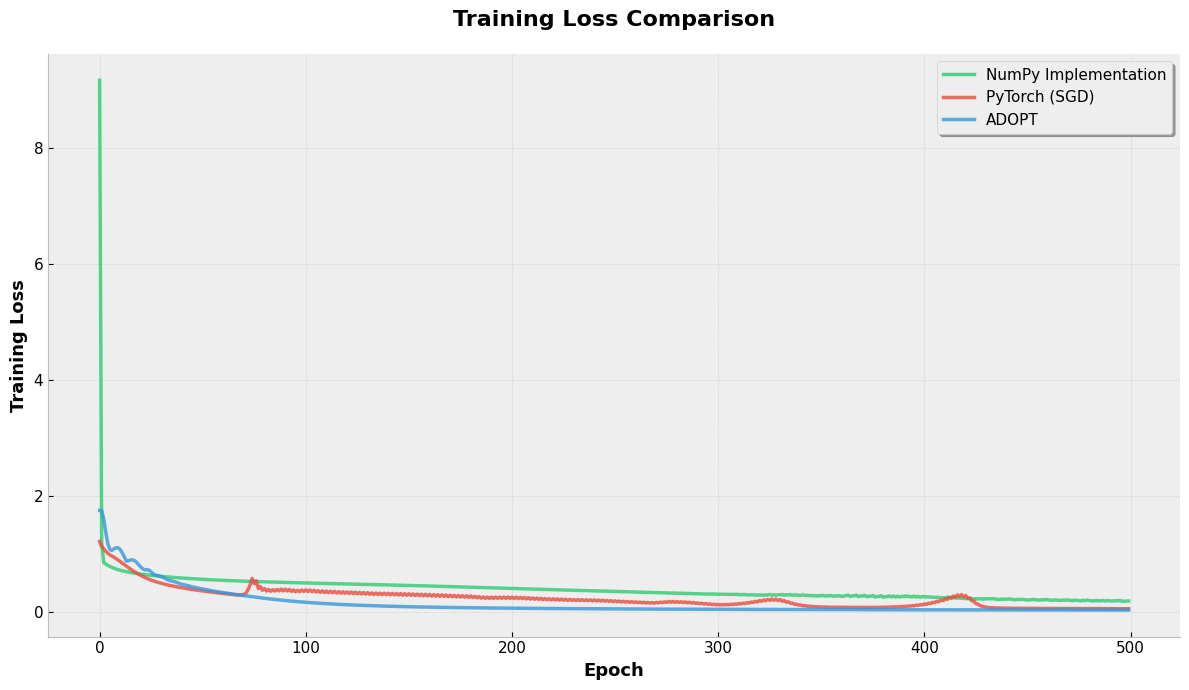

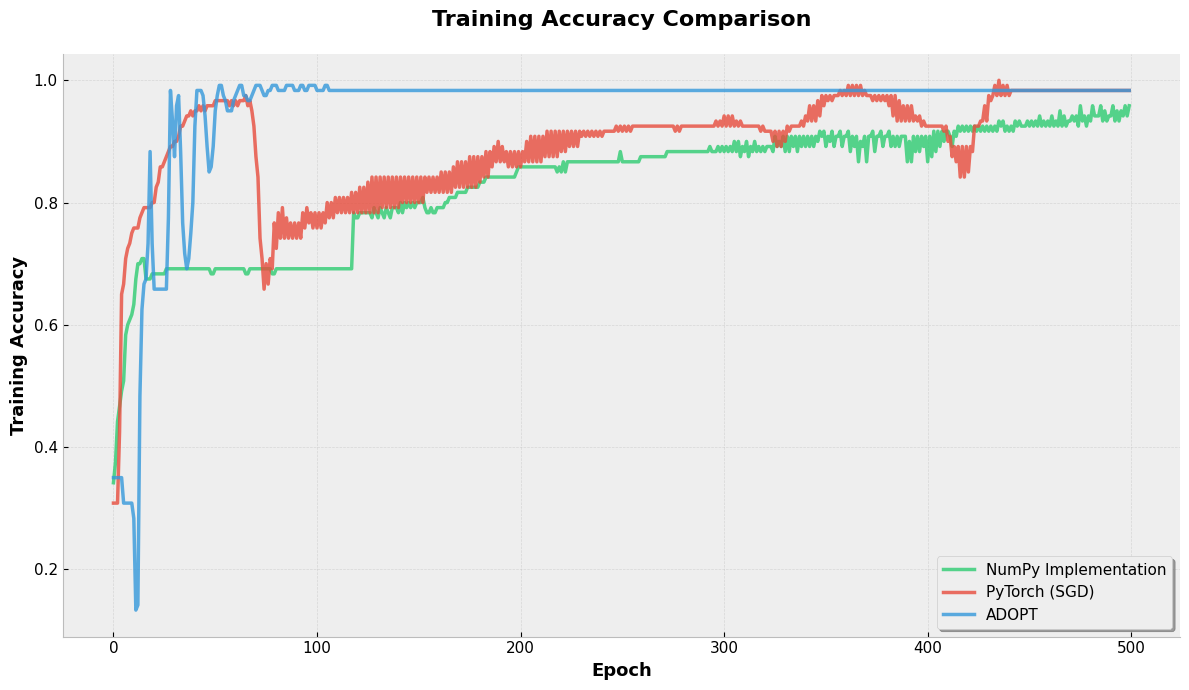

In [ ]:
import matplotlib.pyplot as plt

def train_and_track_models(epochs=EPOCHS):
    # Initialize models with same seeds
    np.random.seed(29387523)
    torch.manual_seed(29387523)

    # Prepare data
    X_train_np = X_train.numpy()
    y_train_np = np.zeros((len(y_train), 3))
    for i in range(len(y_train)):
        y_train_np[i, y_train[i]] = 1

    X_train_torch = X_train
    y_train_torch = y_train

    # Initialize models
    nn_numpy = NeuralNetwork_numpy(input_size=ni, hidden_size=nh, output_size=no)
    nn_pytorch = Pytorch_model()
    nn_adopt = Pytorch_model()

    # Initialize optimizers
    Loss = nn.CrossEntropyLoss()
    optimizer_pytorch = optim.SGD(nn_pytorch.parameters(), lr=0.1)
    optimizer_adopt = ADOPT(nn_adopt.parameters(), lr=0.1)

    # Lists to store both metrics
    numpy_losses, pytorch_losses, adopt_losses = [], [], []
    numpy_accuracies, pytorch_accuracies, adopt_accuracies = [], [], []

    for epoch in range(epochs):
        # Train NumPy model
        y_pred_numpy = nn_numpy.forward(X_train_np)
        numpy_loss = nn_numpy.cross_entropy_loss(y_train_np, y_pred_numpy)
        dW1, db1, dW2, db2 = nn_numpy.backward(X_train_np, y_train_np)
        nn_numpy.update_params(dW1, db1, dW2, db2, 0.1)
        numpy_acc = np.mean(np.argmax(y_pred_numpy, axis=1) == y_train.numpy())

        # Train PyTorch model
        outputs_pytorch = nn_pytorch(X_train_torch)
        loss_pytorch = Loss(outputs_pytorch, y_train_torch)
        optimizer_pytorch.zero_grad()
        loss_pytorch.backward()
        optimizer_pytorch.step()
        pytorch_acc = (torch.argmax(outputs_pytorch, dim=1) == y_train_torch).float().mean().item()

        # Train ADOPT model
        outputs_adopt = nn_adopt(X_train_torch)
        loss_adopt = Loss(outputs_adopt, y_train_torch)
        optimizer_adopt.zero_grad()
        loss_adopt.backward()
        optimizer_adopt.step()
        adopt_acc = (torch.argmax(outputs_adopt, dim=1) == y_train_torch).float().mean().item()

        # Store metrics
        numpy_losses.append(float(numpy_loss))
        pytorch_losses.append(loss_pytorch.item())
        adopt_losses.append(loss_adopt.item())
        numpy_accuracies.append(float(numpy_acc))
        pytorch_accuracies.append(pytorch_acc)
        adopt_accuracies.append(adopt_acc)

    return (numpy_losses, pytorch_losses, adopt_losses,
            numpy_accuracies, pytorch_accuracies, adopt_accuracies)

# Train models and get all metrics
metrics = train_and_track_models()
numpy_losses, pytorch_losses, adopt_losses = metrics[:3]
numpy_acc, pytorch_acc, adopt_acc = metrics[3:]

# Set style for better-looking plots
plt.style.use('bmh')

# Create loss plot
epochs = range(EPOCHS)
fig1, ax1 = plt.subplots(figsize=(12, 7), dpi=100)
ax1.plot(epochs, numpy_losses, label='NumPy Implementation', linewidth=2.5, color='#2ecc71', alpha=0.8)
ax1.plot(epochs, pytorch_losses, label='PyTorch (SGD)', linewidth=2.5, color='#e74c3c', alpha=0.8)
ax1.plot(epochs, adopt_losses, label='ADOPT', linewidth=2.5, color='#3498db', alpha=0.8)
ax1.set_xlabel('Epoch', fontsize=13, fontweight='bold')
ax1.set_ylabel('Training Loss', fontsize=13, fontweight='bold')
ax1.set_title('Training Loss Comparison', fontsize=16, pad=20, fontweight='bold')
ax1.legend(fontsize=11, frameon=True, fancybox=True, shadow=True, loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.4)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

# Create accuracy plot
fig2, ax2 = plt.subplots(figsize=(12, 7), dpi=100)
ax2.plot(epochs, numpy_acc, label='NumPy Implementation', linewidth=2.5, color='#2ecc71', alpha=0.8)
ax2.plot(epochs, pytorch_acc, label='PyTorch (SGD)', linewidth=2.5, color='#e74c3c', alpha=0.8)
ax2.plot(epochs, adopt_acc, label='ADOPT', linewidth=2.5, color='#3498db', alpha=0.8)
ax2.set_xlabel('Epoch', fontsize=13, fontweight='bold')
ax2.set_ylabel('Training Accuracy', fontsize=13, fontweight='bold')
ax2.set_title('Training Accuracy Comparison', fontsize=16, pad=20, fontweight='bold')
ax2.legend(fontsize=11, frameon=True, fancybox=True, shadow=True, loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.4)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelsize=11)
plt.tight_layout()
plt.show()